In [18]:
# https://www.kaggle.com/nathanlauga/nba-games

# qual foi a média de pontos, arremeços, rebotes e assistências nas temporadas 2017, 2018, 2019 de cada jogador?


In [1]:
import pandas as pd
import seaborn as sns
from str_to_second import str_to_second

In [94]:
df_gd = pd.read_csv('datasets/games_details.csv')
df_gd.head(5)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,NaN,27:08,3.0,...,4.0,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,NaN,34:55,17.0,...,2.0,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,NaN,26:25,4.0,...,2.0,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,NaN,27:35,1.0,...,1.0,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,NaN,22:17,2.0,...,1.0,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0


In [48]:
df_g = pd.read_csv('datasets/games.csv')
df_g.head(5)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.900,...,22.0,47.0,1610612749,93.0,0.402,0.762,0.226,20.0,61.0,0
1,2020-03-01,21900896,Final,1610612750,1610612742,2019,1610612750,91.0,0.364,0.400,...,19.0,57.0,1610612742,111.0,0.468,0.632,0.275,28.0,56.0,0
2,2020-03-01,21900897,Final,1610612746,1610612755,2019,1610612746,136.0,0.592,0.805,...,25.0,37.0,1610612755,130.0,0.505,0.650,0.488,27.0,37.0,1
3,2020-03-01,21900898,Final,1610612743,1610612761,2019,1610612743,133.0,0.566,0.700,...,38.0,41.0,1610612761,118.0,0.461,0.897,0.263,24.0,36.0,1
4,2020-03-01,21900899,Final,1610612758,1610612765,2019,1610612758,106.0,0.407,0.885,...,18.0,51.0,1610612765,100.0,0.413,0.667,0.429,23.0,42.0,1


In [5]:
df_gd.shape

(576782, 28)

In [86]:
df_gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576782 entries, 0 to 576781
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            576782 non-null  int64  
 1   TEAM_ID            576782 non-null  int64  
 2   TEAM_ABBREVIATION  576782 non-null  object 
 3   TEAM_CITY          576782 non-null  object 
 4   PLAYER_ID          576782 non-null  int64  
 5   PLAYER_NAME        576782 non-null  object 
 6   START_POSITION     221374 non-null  object 
 7   COMMENT            92260 non-null   object 
 8   MIN                484521 non-null  object 
 9   FGM                484521 non-null  float64
 10  FGA                484521 non-null  float64
 11  FG_PCT             484521 non-null  float64
 12  FG3M               484521 non-null  float64
 13  FG3A               484521 non-null  float64
 14  FG3_PCT            484521 non-null  float64
 15  FTM                484521 non-null  float64
 16  FT

In [7]:
df_gd.isna().sum() / df_gd.shape[0]

GAME_ID              0.000000
TEAM_ID              0.000000
TEAM_ABBREVIATION    0.000000
TEAM_CITY            0.000000
PLAYER_ID            0.000000
PLAYER_NAME          0.000000
START_POSITION       0.616191
COMMENT              0.840044
MIN                  0.159958
FGM                  0.159958
FGA                  0.159958
FG_PCT               0.159958
FG3M                 0.159958
FG3A                 0.159958
FG3_PCT              0.159958
FTM                  0.159958
FTA                  0.159958
FT_PCT               0.159958
OREB                 0.159958
DREB                 0.159958
REB                  0.159958
AST                  0.159958
STL                  0.159958
BLK                  0.159958
TO                   0.159958
PF                   0.159958
PTS                  0.159958
PLUS_MINUS           0.200981
dtype: float64

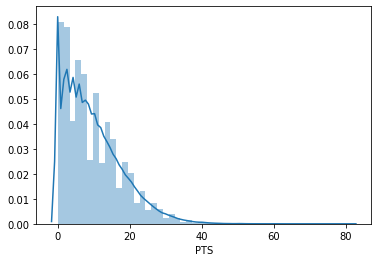

In [86]:
# Visualization to see better
sns.distplot(df_gd['PTS'], bins=50)

In [1]:
# A lot of data is missing.
# How to fill with best way?
# There are players that score zero. So, zero means NaN? How I know it?
# To know whether an athlet played I will verify the minutes

In [102]:
# First I need to convert to time
# df_gd['MINUTES'] = pd.to_datetime(df_gd['MIN'], format="%M:%S")
# Wait I not got to convert '60:06' minutes. A normal game has 48 minutes, but, sometimes one game can has four overtimes.
# I have no this information about this. Anyway I will need to convert In a format that I will compare
df_gd['MIN_SECONDS'] = df_gd['MIN'].apply(str_to_second)

In [95]:
# adiciona a coluna season
df_gd = pd.merge(df_gd, df_g[['GAME_ID','SEASON']], on='GAME_ID', how='left')

In [106]:
df_gd[(df_gd['PTS'] == 0) & (df_gd['MIN_SECONDS'] > 0)]

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON,MIN_SECONDS
8,21900895,1610612749,MIL,Milwaukee,101107,Marvin Williams,NaN,NaN,19:37,0.0,...,2.0,2.0,1.0,1.0,1.0,1.0,0.0,-11.0,2019,1177.0
35,21900896,1610612742,DAL,Dallas,203077,Michael Kidd-Gilchrist,NaN,NaN,2:41,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2019,161.0
47,21900896,1610612750,MIN,Minnesota,1629669,Jaylen Nowell,NaN,NaN,2:41,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,2019,161.0
59,21900897,1610612755,PHI,Philadelphia,203658,Norvel Pelle,NaN,NaN,2:38,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-5.0,2019,158.0
65,21900897,1610612746,LAC,LA,201976,Patrick Beverley,G,NaN,23:49,0.0,...,4.0,4.0,0.0,0.0,1.0,4.0,0.0,-11.0,2019,1429.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576741,11200009,1610612747,LAL,Los Angeles,203196,Ronnie Aguilar,NaN,NaN,8,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,2012,480.0
576744,11200009,1610612744,GSW,Golden State,2740,Andris Biedrins,NaN,NaN,11,0.0,...,0.0,0.0,1.0,0.0,0.0,4.0,0.0,NaN,2012,660.0
576756,11200009,1610612744,GSW,Golden State,203164,Lance Goulbourne,NaN,NaN,7,0.0,...,3.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,2012,420.0
576767,11200005,1610612746,LAC,Los Angeles,101142,Ronny Turiaf,NaN,NaN,23,0.0,...,2.0,2.0,0.0,1.0,2.0,1.0,0.0,NaN,2012,1380.0


In [104]:
df_gd

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON,MIN_SECONDS
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,NaN,27:08,3.0,...,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0,2019,1628.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,NaN,34:55,17.0,...,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0,2019,2095.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,NaN,26:25,4.0,...,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0,2019,1585.0
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,NaN,27:35,1.0,...,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0,2019,1655.0
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,NaN,22:17,2.0,...,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0,2019,1337.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576777,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,19,4.0,...,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN,2012,1140.0
576778,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,23,7.0,...,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN,2012,1380.0
576779,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,15,3.0,...,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN,2012,900.0
576780,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,19,1.0,...,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN,2012,1140.0


In [ ]:
## Para preencher os valores NaN usando a média de pontos por temporada de cada jogador